In [12]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec,
                         summarize,
                         poly)


In [7]:
df= pd.read_csv('/Users/ziyuguo/Documents/AAA_job_finding/1_Data_science/4_ML/ISLP/ISLP_data/Auto.csv')

In [8]:
Auto = load_data("Auto")
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

### Question 8

In [9]:
# OLS regression
# Option 1 to add intercept to predictors to prepare X for regression
X= pd.DataFrame({'intercept':np.ones(Auto.shape[0]),'horsepower':Auto['horsepower']})
y=Auto['mpg']

### (a)

In [10]:
# Model results
model = sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [13]:
# option 2 to transform X for regression
design = ModelSpec(['horsepower'])
design = design.fit(Auto)
X = design.transform(Auto)
X[:4]

,intercept,horsepower
0,1.0,130
1,1.0,165
2,1.0,150
3,1.0,150


## ?? How to sclice columns for DataFrame

In [24]:
# Predict mpg with horsepower = 98
new_df = pd.DataFrame({'horsepower':[98]})
newX = design.transform(new_df)
newX


,intercept,horsepower
0,1.0,98


In [25]:
new_prediction = results.get_prediction(newX)
new_prediction.predicted_mean

array([24.46707715])

In [26]:
new_prediction.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [27]:
new_prediction.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

### (b)

In [29]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

(26.68, 249.32)

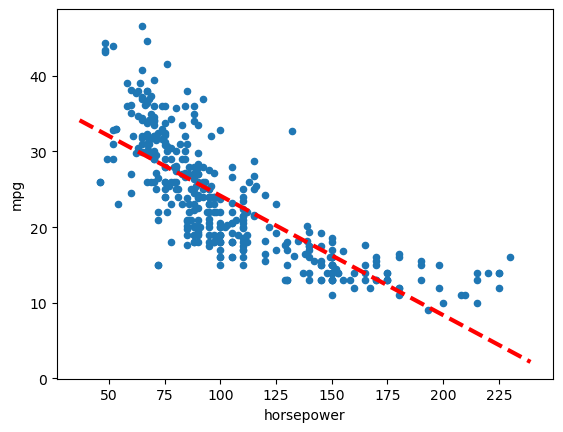

In [31]:
ax = Auto.plot.scatter('horsepower','mpg')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)
a = ax.get_xlim()
a

## ?? How to use `ax.axline` to draw this red line?

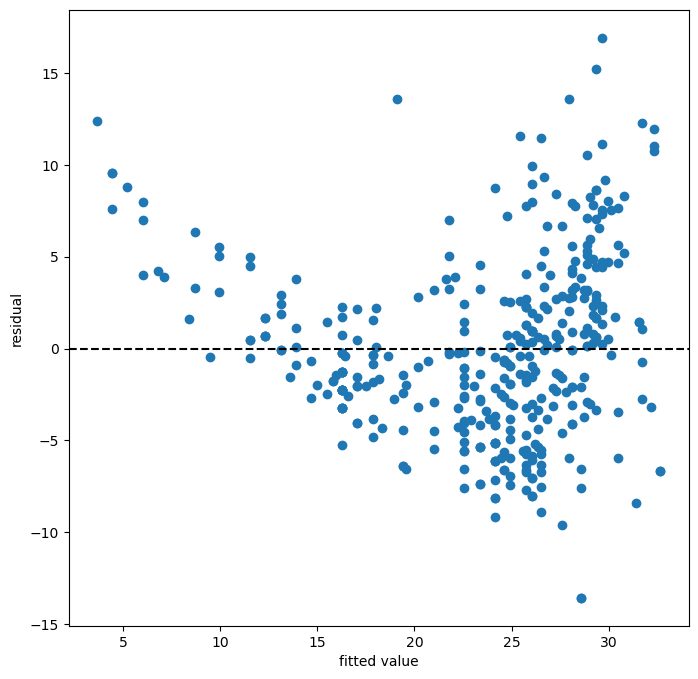

In [37]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues,results.resid)
ax.set_xlabel('fitted value')
ax.set_ylabel('residual')
ax.axhline(0, c='k',ls='--')

There is some evidence of non-linearity.

### Question 9

/var/folders/b4/dg1qfb_d7dlfv97__53drbzr0000gn/T/ipykernel_2114/2431196052.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(Auto,ax=ax);


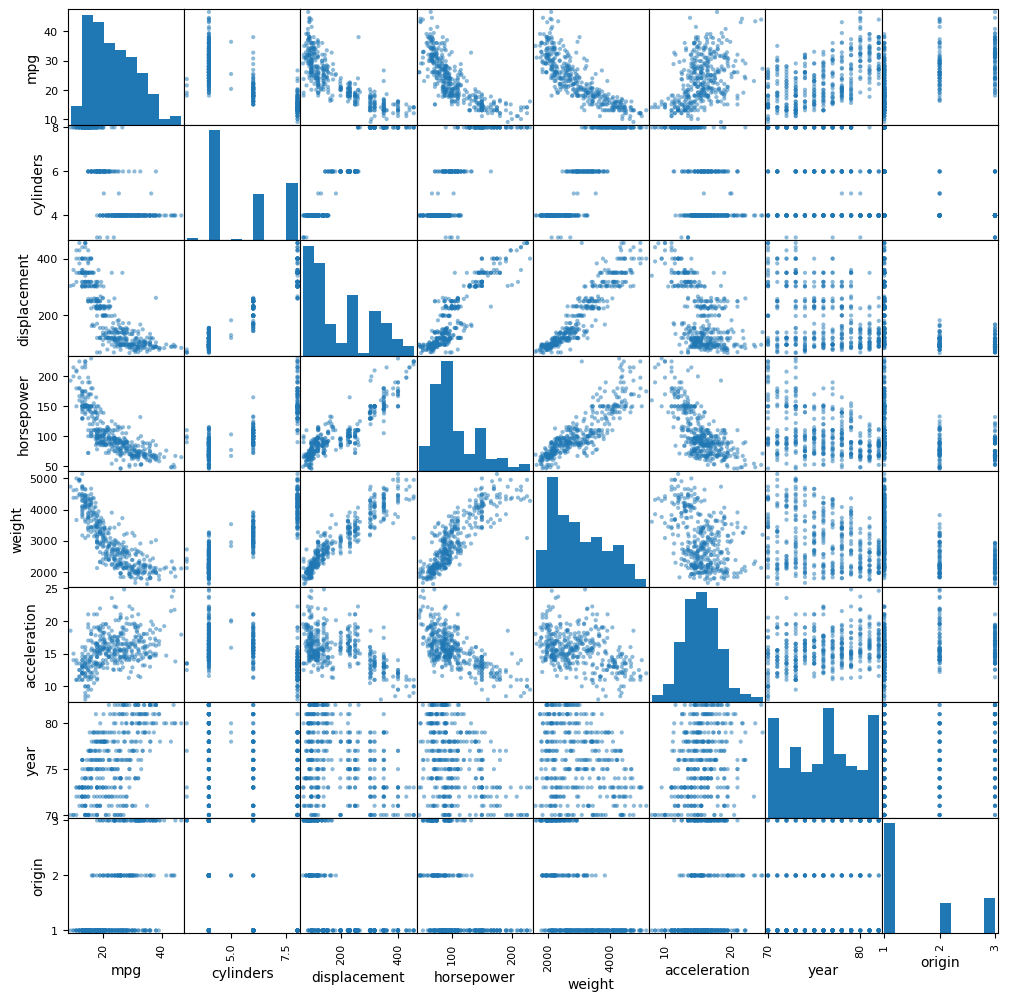

In [41]:
# Plot scatter matrix for Auto data
ax=subplots(figsize=(12,12))[1]
pd.plotting.scatter_matrix(Auto,ax=ax);

In [42]:
# Compute correlation between variables
Auto.corr()

/var/folders/b4/dg1qfb_d7dlfv97__53drbzr0000gn/T/ipykernel_2114/340684133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [61]:
# multilinear regression with y=mpg and X of all other variable except name
predictors = df.columns.drop(['mpg','name'])
predictors

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [62]:
X = ModelSpec(predictors).fit_transform(Auto)
X[:4]

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,1.0,8,307.0,130,3504,12.0,70,1
1,1.0,8,350.0,165,3693,11.5,70,1
2,1.0,8,318.0,150,3436,11.0,70,1
3,1.0,8,304.0,150,3433,12.0,70,1


In [56]:
model=sm.OLS(y,X)
results1 = model.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


### ?? How to use `annva_lm` to compare the two models? how to use it to answer Q9 (c)?

In [57]:
anova_lm(results, results1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.21253,0.0,NaN,NaN,NaN
1,384.0,4252.21253,-0.0,-0.0,NaN,NaN


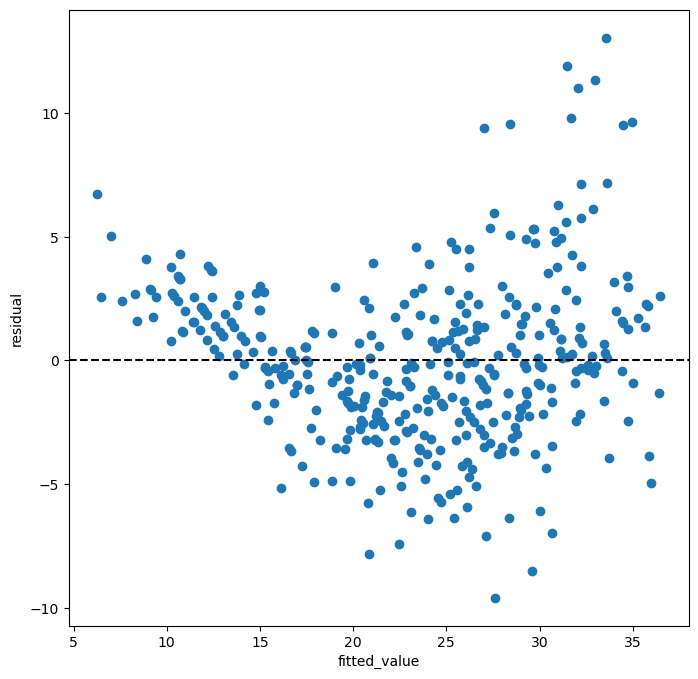

In [59]:
# dignose plot1: residual plot
ax=subplots(figsize=(8,8))[1]
ax.scatter(results1.fittedvalues,results1.resid)
ax.set_xlabel('fitted_value')
ax.set_ylabel('residual')
ax.axhline(0,c='k',ls='--')

13

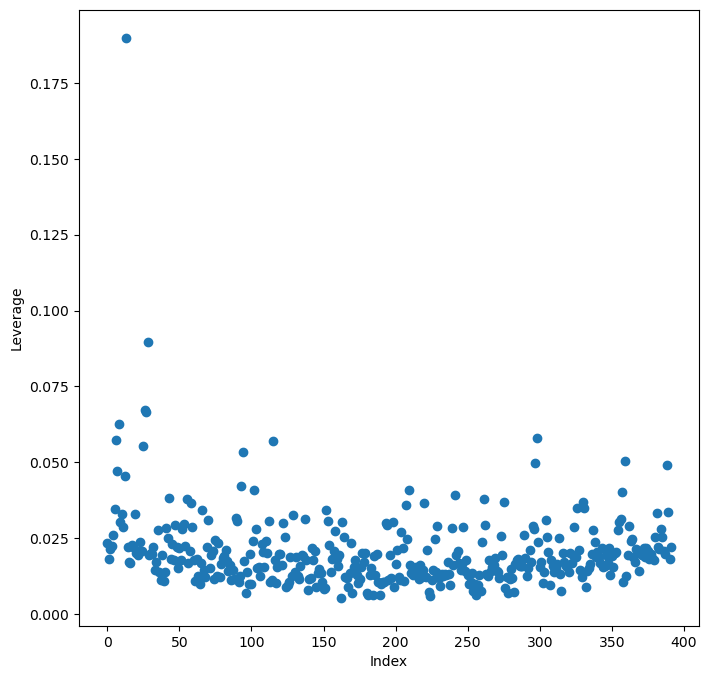

In [60]:
# diagnose plot 2: leverage plot
infl = results1.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

### Observation 13 has unsual high leverage

### (e) Models with interaction terms

In [65]:
X = ModelSpec(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin',('cylinders', 'displacement')]).fit_transform(Auto)
X[:4]

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin,cylinders:displacement
0,1.0,8,307.0,130,3504,12.0,70,1,2456.0
1,1.0,8,350.0,165,3693,11.5,70,1,2800.0
2,1.0,8,318.0,150,3436,11.0,70,1,2544.0
3,1.0,8,304.0,150,3433,12.0,70,1,2432.0


In [66]:
model1 = sm.OLS(y,X)
result1 = model1.fit()
summarize(result1)

,coef,std err,t,P>|t|
intercept,-2.7097,4.686,-0.578,0.563
cylinders,-2.6962,0.409,-6.584,0.000
displacement,-0.0775,0.014,-5.474,0.000
horsepower,-0.0476,0.013,-3.559,0.000
weight,-0.0052,0.001,-8.370,0.000
acceleration,0.0598,0.092,0.651,0.515
year,0.7595,0.047,16.044,0.000
origin,0.7087,0.274,2.590,0.010
cylinders:displacement,0.0136,0.002,7.907,0.000


### (f) model with transformation of X

In [69]:
model2 = sm.OLS(y,np.log(X))
result2 = model2.fit()
summarize(result2)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


,coef,std err,t,P>|t|
intercept,0.0000,0.000,NaN,NaN
cylinders,1.1660,1.538,0.758,0.449
displacement,-0.7227,1.489,-0.485,0.628
horsepower,-8.0287,1.558,-5.153,0.000
weight,-14.3771,2.212,-6.501,0.000
acceleration,-5.6909,1.625,-3.503,0.001
year,43.5453,1.927,22.593,0.000
origin,1.4350,0.516,2.783,0.006
cylinders:displacement,0.4433,0.410,1.082,0.280


In [70]:
model3 = sm.OLS(y,np.sqrt(X))
result3 = model3.fit()
summarize(result3)

,coef,std err,t,P>|t|
intercept,-7.7852,10.925,-0.713,0.477
cylinders,-19.2850,3.316,-5.816,0.000
displacement,-3.1889,0.576,-5.533,0.000
horsepower,-1.1982,0.300,-3.991,0.000
weight,-0.5518,0.076,-7.266,0.000
acceleration,-0.5435,0.795,-0.683,0.495
year,13.2112,0.820,16.110,0.000
origin,2.0231,0.756,2.677,0.008
cylinders:displacement,1.3957,0.218,6.402,0.000


In [71]:
model4 = sm.OLS(y,np.square(X))
result4 = model4.fit()
summarize(result4)

,coef,std err,t,P>|t|
intercept,6.428400e+00,2.226000e+00,2.888,0.004
cylinders,-1.636000e-01,2.400000e-02,-6.683,0.000
displacement,-2.000000e-04,2.750000e-05,-5.844,0.000
horsepower,-2.000000e-04,4.710000e-05,-3.190,0.002
weight,-7.603000e-07,8.420000e-08,-9.035,0.000
acceleration,6.000000e-03,2.000000e-03,2.459,0.014
year,4.900000e-03,0.000000e+00,15.212,0.000
origin,1.940000e-01,6.800000e-02,2.868,0.004
cylinders:displacement,3.544000e-06,3.980000e-07,8.903,0.000


### Question 10

In [75]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [76]:
# (a) fit a multilinear model
y=Carseats['Sales']
X=ModelSpec(['Price','Urban','US']).fit_transform(Carseats)
model = sm.OLS(y,X)
result= model.fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


In [79]:
#(e) fit a smaller model with only evident association of outcome
newX = ModelSpec(['Price','US']).fit_transform(Carseats)
model1 = sm.OLS(y,newX)
result1 = model1.fit()
summarize(result1)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [80]:
#(g) 95% CI for cofficient
result1.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


In [81]:
# (h) leverage
np.arange?

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

``arange`` can be called with a varying number of positional arguments:

* ``arange(stop)``: Values are generated within the half-open interval
  ``[0, stop)`` (in other words, the interval including `start` but
  excluding `stop`).
* ``arange(start, stop)``: Values are generated within the half-open
  interval ``[start, stop)``.
* ``arange(start, stop, step)`` Values are generated within the half-open
  interval ``[start, stop)``, with spacing between values given by
  ``step``.

For integer arguments the function is roughly equivalent to the Python
built-in :py:class:`range`, but returns an ndarray rather than a ``range``
instance.

When using a non-integer step, such as 0.1, it is often better to use
`numpy.linspace`.

See the Warning sections below for more information.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interva

In [82]:
X.shape[0]

400

In [84]:
np.arange(X.shape[0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

42

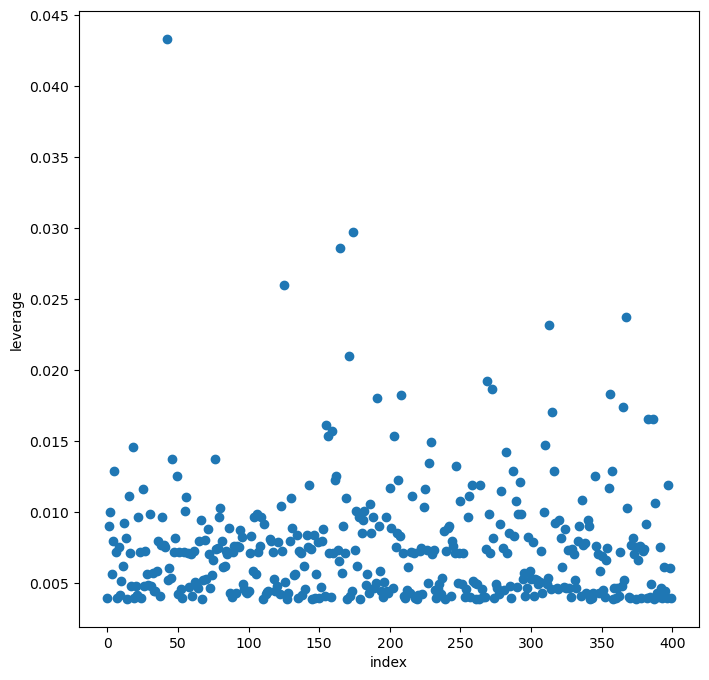

In [86]:
infl = result1.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]),infl.hat_matrix_diag)
ax.set_xlabel('index')
ax.set_ylabel('leverage')
np.argmax(infl.hat_matrix_diag)
                         

### Question 11

In [87]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2*x + rng.normal(size = 100)

In [88]:
#(a)
model0 = sm.OLS(y,x)
result0 = model0.fit()
summarize(result0)

,coef,std err,t,P>|t|
x1,1.9762,0.117,16.898,0.0


In [102]:
#(b)
model1 = sm.OLS(x,y)
result1 = model1.fit()
summarize(result1)

,coef,std err,t,P>|t|
x1,0.3757,0.022,16.898,0.0


### Question 12 (seems same to Q11)

### Question 13

In [107]:
#(a)
np.random.normal?

SyntaxError: invalid syntax (782630770.py, line 2)

In [108]:
x = np.random.normal(0,1,100)

In [109]:
eps = np.random.normal(0,0.5,100)

In [110]:
y = -1 + 0.5*x + eps

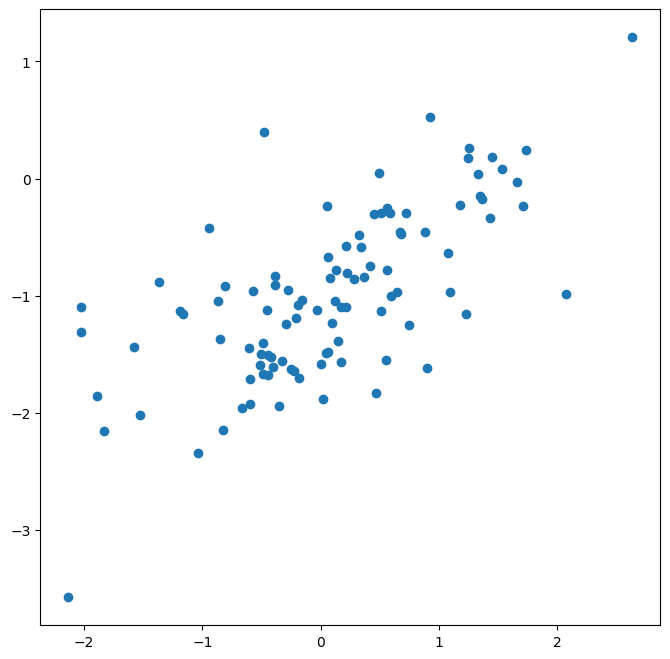

In [111]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(x,y)

In [112]:
X = pd.DataFrame(x)
X = ModelSpec(X.columns).fit_transform(X)
model = sm.OLS(y,X)
result = model.fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,-1.0314,0.054,-19.200,0.0
X0,0.5288,0.057,9.224,0.0


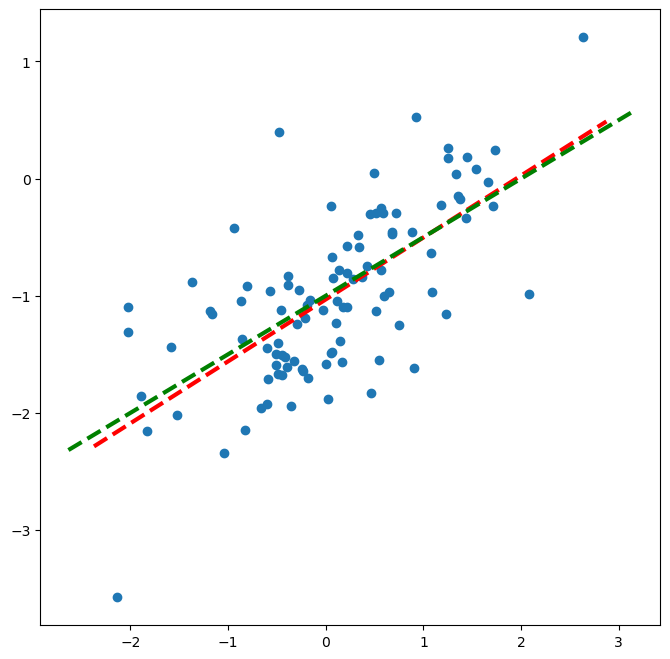

In [115]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(x,y)
abline(ax,
       result.params[0],
       result.params[1],
       'r--',
       linewidth=3)
abline(ax,
       -1,
       0.5,
       'g--',
       linewidth=3)

In [117]:
X = pd.DataFrame(x)
X.columns=['x']
X.head(2)

,x
0,-1.188071
1,0.175071


In [119]:
# (g) ploynomial regression
X = ModelSpec([poly('x',degree=2),'x']).fit_transform(X)
X[:4]

,intercept,"poly(x, degree=2)[0]","poly(x, degree=2)[1]",x
0,1.0,-0.135227,0.053148,-1.188071
1,1.0,0.010718,-0.068489,0.175071
2,1.0,0.040063,-0.057119,0.449153
3,1.0,-0.010973,-0.069183,-0.027523


In [120]:
model = sm.OLS(y,X)
result = model.fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,-1.0309,0.053,-19.315,0.000
"poly(x, degree=2)[0]",0.0642,0.006,10.554,0.000
"poly(x, degree=2)[1]",0.7981,0.532,1.500,0.137
x,0.5219,0.056,9.267,0.000


In [ ]:
# (h),(i),(j)

### Question 14

In [121]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0,1,size=100)
x2 = 0.5*x1 +rng.normal(size = 100)/10
y = 2+2*x1+0.3*x2+rng.normal(size=100)

Text(0, 0.5, 'x2')

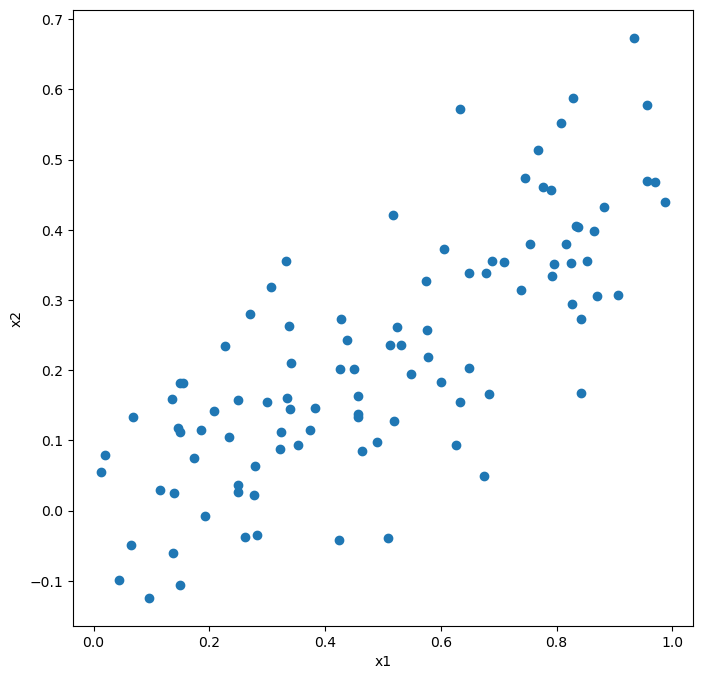

In [126]:
#(a)
ax = subplots(figsize=(8,8))[1]
ax.scatter(x1,x2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [154]:
#(b)
X = pd.DataFrame((x1,x2),index=None)
X=X.T
X.columns = ['x1','x2']
X.head()

,x1,x2
0,0.956002,0.469359
1,0.207682,0.142509
2,0.828445,0.587699
3,0.149282,0.181141
4,0.512805,0.236458


In [152]:

X0 = ModelSpec(X.columns).fit_transform(X)
model = sm.OLS(y,X0)
result = model.fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


In [156]:
#(c)
X1 = ModelSpec(['x1']).fit_transform(X)
model = sm.OLS(y,X1)
result = model.fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


In [157]:
#(d)
X2 = ModelSpec(['x2']).fit_transform(X)
model = sm.OLS(y,X2)
result = model.fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


In [ ]:
#(e)(f)

### Question 15

In [159]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [165]:
def OLS(y,df,x):
    X = ModelSpec([x]).fit_transform(df)
    model = sm.OLS(y,X)
    result = model.fit()
    return result
    

In [171]:
y=Boston['crim']
result=[]
for x in Boston.columns:
    result.append(OLS(y,Boston,x))
for i in range(len(result)):
    print(summarize(result[i]))
    print('\n')

                   coef       std err             t  P>|t|
intercept  3.695000e-15  3.620000e-16  1.021800e+01    0.0
crim       1.000000e+00  3.880000e-17  2.580000e+16    0.0


             coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0


             coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000


             coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209


              coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0


              coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0


             coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0


             coef  std err       t  P>|t|
intercept  9.4993

In [174]:
#(b)
pred = Boston.drop(columns=['crim'])
X = ModelSpec(pred.columns).fit_transform(Boston)
model = sm.OLS(y,X)
result_m = model.fit()
summarize(result_m)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


In [179]:
#(c)
para_a =[]
for i in range(len(result)):
    para_a.append(result[i].params[1])
para_a
para_a = para_a[1:]
para_a

[-0.07393497740412301,
 0.5097763311042269,
 -1.8927765508037848,
 31.248531201122923,
 -2.68405122411395,
 0.10778622713953297,
 -1.5509016824100992,
 0.6179109273272022,
 0.029742252822765325,
 1.1519827870705903,
 0.548804782062398,
 -0.3631599222576029]

In [180]:
para_b = result_m.params[1:]
para_b

zn         0.045710
indus     -0.058350
chas      -0.825378
nox       -9.957587
rm         0.628911
age       -0.000848
dis       -1.012247
rad        0.612465
tax       -0.003776
ptratio   -0.304073
lstat      0.138801
medv      -0.220056
dtype: float64

In [191]:
para = pd.DataFrame((para_a,para_b),index=None)
para=para.T
para.columns = ['para_a','para_b']
para

,para_a,para_b
0,-0.073935,0.045710
1,0.509776,-0.058350
2,-1.892777,-0.825378
3,31.248531,-9.957587
4,-2.684051,0.628911
5,0.107786,-0.000848
6,-1.550902,-1.012247
7,0.617911,0.612465
8,0.029742,-0.003776
9,1.151983,-0.304073


<Axes: xlabel='para_a', ylabel='para_b'>

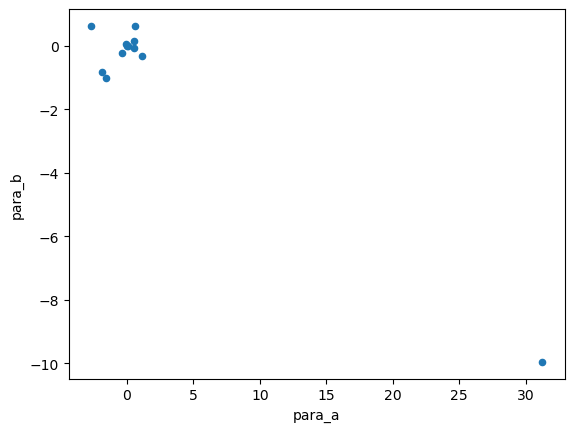

In [190]:
para.plot.scatter('para_a','para_b')